In [1]:
import pandas as pd

D:\python\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 1.Read the DataSet

In [2]:
df=pd.read_csv('fraud_dataset.csv')

In [3]:
#First 10 rows of the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Check total rows and columns , here 636260 are rows and 11 columnns
df.shape

(6362620, 11)

In [5]:
# Check Columns Names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Check the datatypes of the columns 
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Check Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#Check duplicate rows
df.duplicated().sum()

0

In [9]:
#Check unique value for the categorical data column "type"
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
#Check unique value for the categorical data column "isFraud"
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [11]:
#check fraud or non value counts
# 0 means not fraud and 1 means fraud 
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### 2. Data Preprocessing

##### a. Remove Uncessary Columns

In [12]:
#remove the "nameorig" ,"namedest"and "isFlaggedFraud" columns because these are just Ids and also in categorical form
df.drop(['nameOrig', 'nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [13]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


##### b. Convert Categorical "type" Column in numerical using One Hot Encoding

In [14]:

df = pd.get_dummies(df, columns = ["type"])

In [15]:
#True = 1 , False = 0
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,False,True


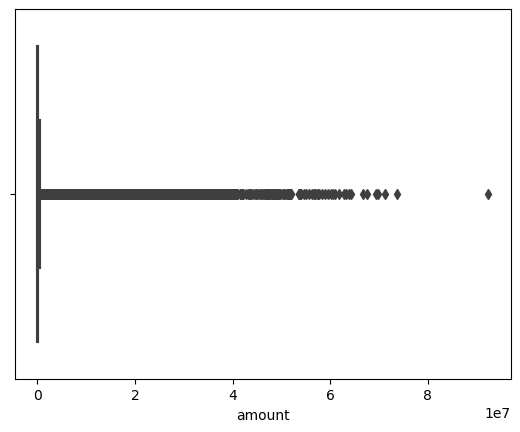

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['amount'])
plt.show()

##### c. Feature Scaling using the min max normalization method

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']] = scaler.fit_transform(df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']])


In [18]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0.0,1.0,0.0,0.0,0.0
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0.0,1.0,0.0,0.0,0.0
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0


### 3. Training and Testing

##### a. Split the dataset into Feature and Target variable

In [19]:
#Since we are predicting fraud, the isFraud column is the target (Y), and the rest are features (X).
X = df.drop(columns=['isFraud'])  # Features (everything except isFraud)
y = df['isFraud']  # Target (isFraud column)

In [20]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000002,0.000003,0.000000,0.000059,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [22]:
#convert type column values into binary for more accuracy
df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']] = df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].astype(int)


In [23]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0,0,1,0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0,0,1,0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0,0,0,1
3,0.0,0.000002,0.000003,0.000000,0.000059,0.0,1,0,1,0,0,0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0,0,1,0


##### b. Split the data into training and testing set

In [24]:
#import the class train_test_split
from sklearn.model_selection import train_test_split

#X_train - 80% of the input features for training
#X_test  - 20% of the input features for testing
#y_train - 80% of isFraud labels for training
#y_test  - 20% of isFraud labels for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [25]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5090096, 11) (5090096,)
Testing set shape: (1272524, 11) (1272524,)


##### c.Model Training

In [26]:
#Apply Oversampling (SMOTE) to Balance the Data
#SMOTE :- Synthetic Mining Oversampling Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
# Print new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

Before SMOTE: isFraud
0    5083553
1       6543
Name: count, dtype: int64
After SMOTE: isFraud
0    5083553
1    5083553
Name: count, dtype: int64


In [28]:
#import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#create the Model
model=model = LogisticRegression(max_iter=700)

In [29]:
#Train the model using our training data (X_train for features and y_train for labels). 
#This means the model will learn patterns from the data and make accurate predictions.
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=700)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the trained model
y_pred = model.predict(X_test)

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9308107352002791


In [32]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Define conf_matrix here
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1182943   87911]
 [    134    1536]]


In [33]:
# Print classification report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96   1270854
           1       0.02      0.92      0.03      1670

    accuracy                           0.93   1272524
   macro avg       0.51      0.93      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



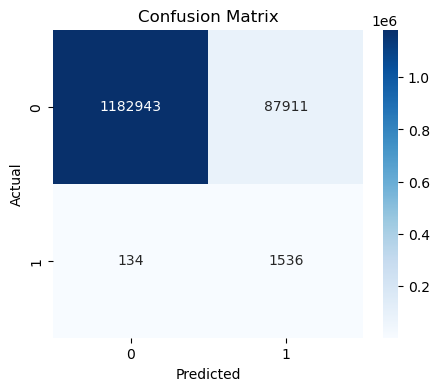

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 


### Comparison with other Models

### 1.Naive Bayes

Naive Bayes Performance
Accuracy: 0.5659963977103771
Precision: 0.0030147125191804314
Recall: 1.0
F1 Score: 0.0060113026888880886


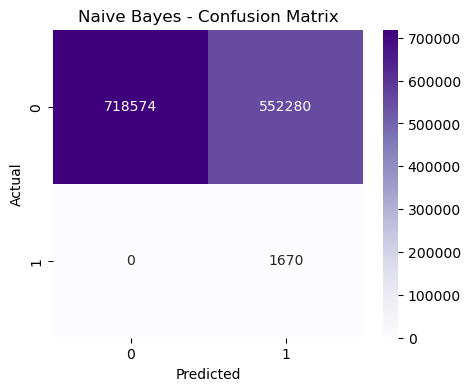

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))


# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Purples')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2. Decision Tree

Decision Tree Performance
Accuracy: 0.999711596795031
Precision: 0.9069331667707683
Recall: 0.8694610778443114
F1 Score: 0.8878018954448181


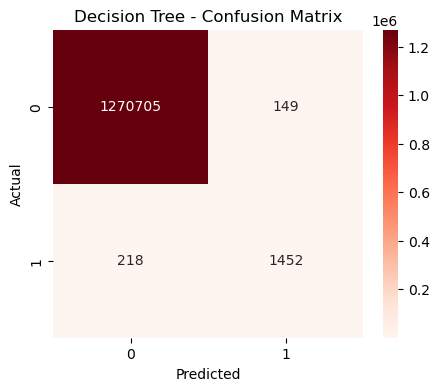

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
sample_indices = [5, 10, 24567, 100]  

# Loop through selected samples
for index in sample_indices:
    sample_features = X_test.iloc[index].values.reshape(1, -1)  # Get features
    actual_label = y_test.iloc[index]  # Get actual fraud label
    predicted_label = model.predict(sample_features)[0]  # Predict fraud or not
    
    print(f"Sample {index}:")
    print(f"  Actual Label: {'Fraud' if actual_label == 1 else 'Not Fraud'}")
    print(f"  Predicted Label: {'Fraud' if predicted_label == 1 else 'Not Fraud'}\n")

Sample 5:
  Actual Label: Not Fraud
  Predicted Label: Not Fraud

Sample 10:
  Actual Label: Not Fraud
  Predicted Label: Fraud

Sample 24567:
  Actual Label: Not Fraud
  Predicted Label: Not Fraud

Sample 100:
  Actual Label: Not Fraud
  Predicted Label: Not Fraud



D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Frontend Part

In [38]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [39]:
original_sample = scaler.inverse_transform([X_test.iloc[0]])


In [40]:
# Get column names
feature_names = X_test.columns

# Convert to DataFrame for easy viewing
import pandas as pd
original_df = pd.DataFrame(original_sample, columns=feature_names)
print(original_df.T)


                        0
step               138.00
amount          157548.74
oldbalanceOrg       41.00
newbalanceOrig       0.00
oldbalanceDest       0.00
newbalanceDest  157548.74
type_CASH_IN         0.00
type_CASH_OUT        1.00
type_DEBIT           0.00
type_PAYMENT         0.00
type_TRANSFER        0.00


In [41]:
# Pick one test sample
i = 0  # Change this index for different rows

# Inverse transform to get original (raw) values
raw_sample = scaler.inverse_transform([X_test.iloc[i]])

# Convert to DataFrame
import pandas as pd
sample_df = pd.DataFrame(raw_sample, columns=X_test.columns)

# Print for copy-pasting
print("==== INPUT FOR FRONTEND ====")
print(sample_df.T)

# Also show actual label
print(f"\ Actual Label (isFraud): {y_test.iloc[i]}")


==== INPUT FOR FRONTEND ====
                        0
step               138.00
amount          157548.74
oldbalanceOrg       41.00
newbalanceOrig       0.00
oldbalanceDest       0.00
newbalanceDest  157548.74
type_CASH_IN         0.00
type_CASH_OUT        1.00
type_DEBIT           0.00
type_PAYMENT         0.00
type_TRANSFER        0.00
\ Actual Label (isFraud): 0


In [42]:
# Create a DataFrame from test features and labels
X_test_df = X_test.copy()
X_test_df["isFraud"] = y_test.values

# Filter only fraud transactions
fraud_cases = X_test_df[X_test_df["isFraud"] == 1]

print(f"Found {len(fraud_cases)} fraud transactions in the test set.")
fraud_cases.head()  # show first few fraud cases


Found 1670 fraud transactions in the test set.


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
6006150,0.576819,0.009056,0.014050,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1
6010951,0.601078,0.002371,0.003678,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1
5550828,0.514825,0.044404,0.068892,0.0,0.00037,0.011895,0.0,1.0,0.0,0.0,0.0,1
6259035,0.807278,0.022670,0.035172,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1
3419451,0.343666,0.106129,0.164657,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1


In [43]:
# Drop 'isFraud' before inverse transform
fraud_features = fraud_cases.drop("isFraud", axis=1)

# Pick first fraud case
first_fraud_scaled = fraud_features.iloc[0]
first_fraud_raw = scaler.inverse_transform([first_fraud_scaled])

# Format it as DataFrame
import pandas as pd
fraud_df = pd.DataFrame(first_fraud_raw, columns=fraud_features.columns)

# Print nicely
print("Fraud Sample Input for Web Form:")
print(fraud_df.T)

# Actual label
print("\nActual Label (isFraud): 1")


Fraud Sample Input for Web Form:
                        0
step               429.00
amount          837192.23
oldbalanceOrg   837192.23
newbalanceOrig       0.00
oldbalanceDest       0.00
newbalanceDest       0.00
type_CASH_IN         0.00
type_CASH_OUT        0.00
type_DEBIT           0.00
type_PAYMENT         0.00
type_TRANSFER        1.00

Actual Label (isFraud): 1


### Data Visualisation

In [44]:
# If you only have encoded columns
df['type'] = df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].idxmax(axis=1)


#### 1. Transaction Type Distribution

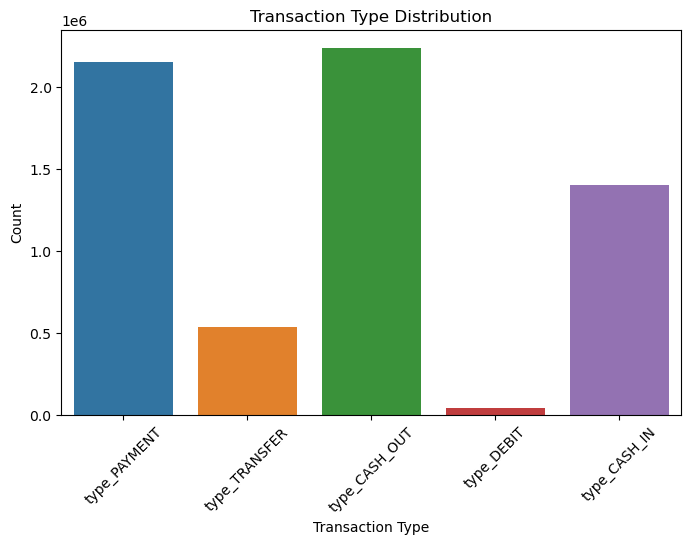

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### 2. Fraud vs Non Fraud Transactions

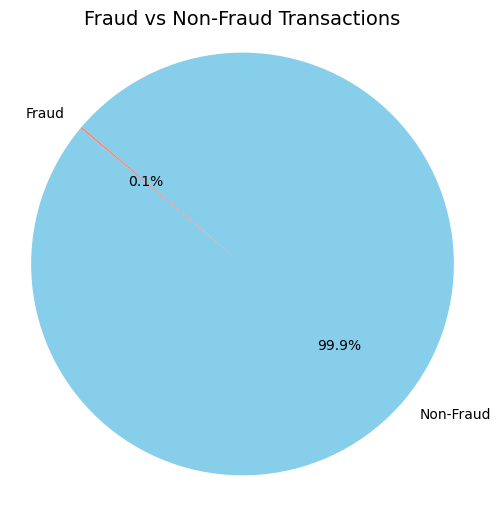

In [46]:
import matplotlib.pyplot as plt

# Count fraud and non-fraud
fraud_counts = df['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14)
plt.axis('equal')
plt.show()


#### 3: Average Transaction Amount By Type

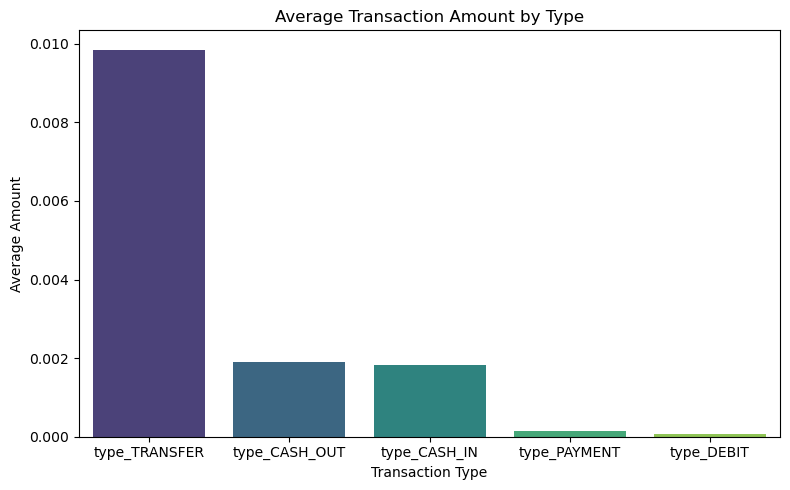

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and calculate mean
avg_amount = df.groupby('type')['amount'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_amount.index, y=avg_amount.values, palette='viridis')
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.tight_layout()
plt.show()


#### 4. Fraud Count By Transaction Type

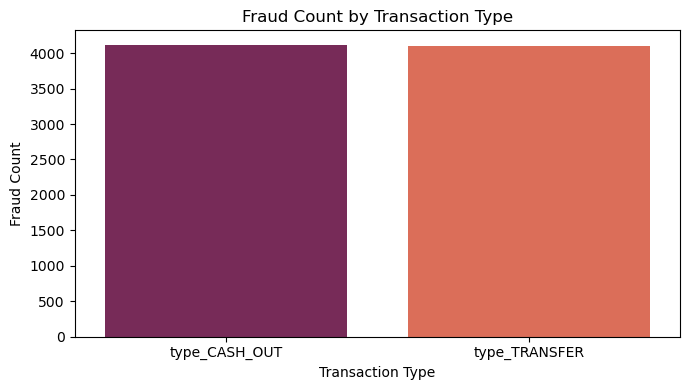

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate original 'type' column if needed
if 'type' not in df.columns:
    df['type'] = df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].idxmax(axis=1)
    df['type'] = df['type'].apply(lambda x: x.replace('type_', ''))

# Group fraud cases only
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='rocket')
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.show()


#### 5. Model Comparison 

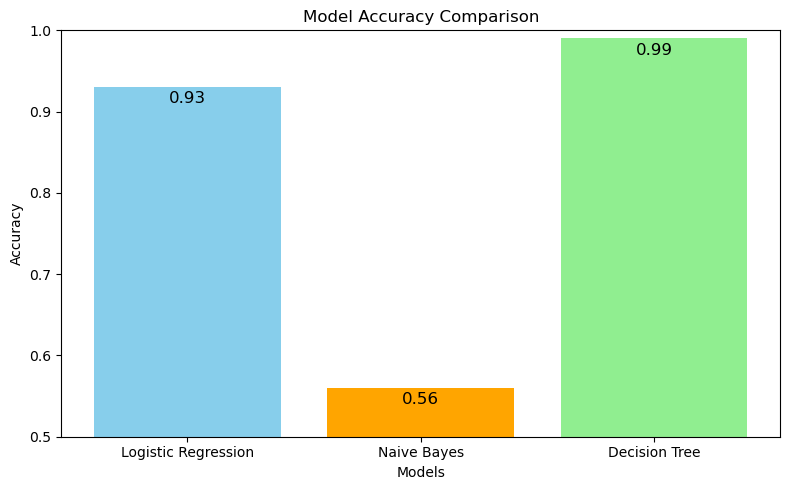

In [50]:
import matplotlib.pyplot as plt

# Example: Replace these with your actual accuracy values
model_names = ['Logistic Regression','Naive Bayes', 'Decision Tree']
accuracies = [0.93, 0.56, 0.99]  # example values

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(0.5, 1.0)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02, f'{height:.2f}', ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()
